In [1]:
import numpy as np # linear algebra
from scipy import signal
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import time
%matplotlib inline
import tensorflow
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv1D, MaxPool1D, BatchNormalization
from keras.layers.advanced_activations import LeakyReLU, PReLU
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
from sklearn.model_selection import train_test_split
import keras.backend as K

Using TensorFlow backend.


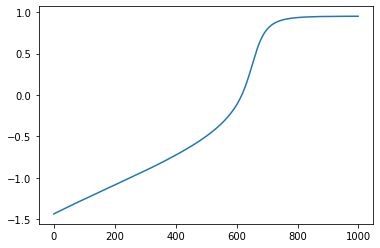

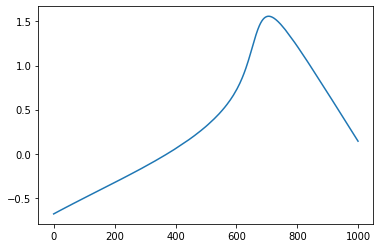

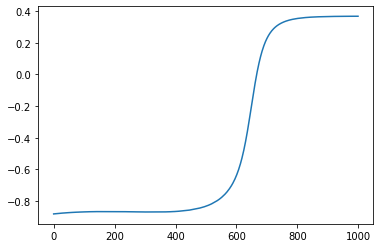

(800, 1000, 3) (800, 500) (200, 1000, 3) (200, 500)


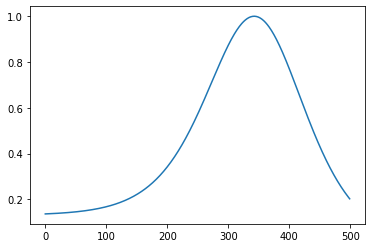

In [22]:
#X=np.loadtxt('X.csv',delimiter=',')
#Y=np.loadtxt('Y.csv',delimiter=',')
Y=Y*1e20

X=np.reshape(X,(-1,1000,3))

for i in range(3):
    mean=np.mean(X[:,:,i])
    std=np.std(X[:,:,i])
    X[:,:,i]=(X[:,:,i]-mean)/std

plt.plot(np.transpose(X[1,:,0]))
plt.show()
plt.plot(np.transpose(X[1,:,1]))
plt.show()
plt.plot(np.transpose(X[1,:,2]))
plt.show()

#plt.plot(np.transpose(Y))
plt.plot(Y[1,:])

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

print(np.shape(x_train),np.shape(y_train),np.shape(x_test),np.shape(y_test))

In [3]:
#Data Analysis
'''print(np.shape(X))
X = np.reshape(np.transpose(X,(0,2,1)),(-1,1000*3))
X=(X-np.mean(X,axis=0))/np.std(X,axis=0)
X_=np.matrix.transpose(X)

lambd,W=np.linalg.eig(np.matmul(X_,X))

plt.plot(np.log(lambd))
plt.show()

Z=np.abs(np.matmul(X,W[:,:3]))
print(np.shape(Z))

for i in range(4):
    plt.scatter(Z[:,0],Z[:,1], c=Y[:,i], cmap="coolwarm")
    plt.show()
'''

'print(np.shape(X))\nX = np.reshape(np.transpose(X,(0,2,1)),(-1,1000*3))\nX=(X-np.mean(X,axis=0))/np.std(X,axis=0)\nX_=np.matrix.transpose(X)\n\nlambd,W=np.linalg.eig(np.matmul(X_,X))\n\nplt.plot(np.log(lambd))\nplt.show()\n\nZ=np.abs(np.matmul(X,W[:,:3]))\nprint(np.shape(Z))\n\nfor i in range(4):\n    plt.scatter(Z[:,0],Z[:,1], c=Y[:,i], cmap="coolwarm")\n    plt.show()\n'

In [4]:
model = Sequential()

model.add(Flatten(input_shape=(1000,3)))
model.add(Dense(2048, activation='linear'))
model.add(LeakyReLU(alpha=.1))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(4046, activation='linear'))
model.add(LeakyReLU(alpha=.1))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(2048, activation='linear'))
model.add(LeakyReLU(alpha=.1))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(500, activation='sigmoid'))

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 3000)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 2048)              6146048   
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 2048)              0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 2048)              8192      
_________________________________________________________________
dropout_1 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_2 (Dense)      

In [5]:
#import tensorflow as tf
def loss_func(y_true,y_pred):
    lambd = 0.01 #Regularisation parameter
    return K.sqrt(K.sum(K.square(y_pred - y_true), axis=-1)) #+ lambd*K.sum(K.square(y_pred[:,1:]-y_pred[:,:-1]))

In [11]:
model.compile(loss=loss_func, optimizer = Adam(lr=1e-4), metrics=["accuracy"]) #binary_crossentropy

annealer = LearningRateScheduler(lambda x: 1e-3 * 0.9 ** x)

hist = model.fit(x=x_train, y=y_train, batch_size=512,
                           epochs=100, #Increase this when not on Kaggle kernel
                           verbose=2,  #1 for ETA, 0 for silent
                           validation_data=(x_test, y_test), #For speed
                           callbacks=[annealer])

Train on 800 samples, validate on 200 samples
Epoch 1/100
 - 4s - loss: 3.8221 - acc: 0.0038 - val_loss: 6.1701 - val_acc: 0.0550
Epoch 2/100
 - 1s - loss: 4.2247 - acc: 0.0050 - val_loss: 6.4567 - val_acc: 0.0650
Epoch 3/100
 - 1s - loss: 3.4258 - acc: 0.0025 - val_loss: 6.4752 - val_acc: 0.0600
Epoch 4/100
 - 1s - loss: 3.0275 - acc: 0.0113 - val_loss: 5.9748 - val_acc: 0.0700
Epoch 5/100
 - 1s - loss: 2.7828 - acc: 0.0063 - val_loss: 5.9561 - val_acc: 0.0600
Epoch 6/100
 - 1s - loss: 2.5630 - acc: 0.0025 - val_loss: 5.7490 - val_acc: 0.0400
Epoch 7/100
 - 1s - loss: 2.3039 - acc: 0.0063 - val_loss: 5.6478 - val_acc: 0.0500
Epoch 8/100
 - 1s - loss: 2.2987 - acc: 0.0063 - val_loss: 5.2646 - val_acc: 0.0100
Epoch 9/100
 - 1s - loss: 2.1117 - acc: 0.0150 - val_loss: 5.1722 - val_acc: 0.0050
Epoch 10/100
 - 1s - loss: 2.0252 - acc: 0.0025 - val_loss: 5.0465 - val_acc: 0.0000e+00
Epoch 11/100
 - 2s - loss: 1.9705 - acc: 0.0063 - val_loss: 4.7458 - val_acc: 0.0000e+00
Epoch 12/100
 - 1s -

Epoch 95/100
 - 1s - loss: 1.4968 - acc: 0.0113 - val_loss: 1.1530 - val_acc: 0.0000e+00
Epoch 96/100
 - 1s - loss: 1.5638 - acc: 0.0075 - val_loss: 1.1457 - val_acc: 0.0000e+00
Epoch 97/100
 - 1s - loss: 1.5902 - acc: 0.0025 - val_loss: 1.1406 - val_acc: 0.0000e+00
Epoch 98/100
 - 1s - loss: 1.4934 - acc: 0.0088 - val_loss: 1.1350 - val_acc: 0.0000e+00
Epoch 99/100
 - 1s - loss: 1.7645 - acc: 0.0138 - val_loss: 1.1290 - val_acc: 0.0000e+00
Epoch 100/100
 - 1s - loss: 1.5044 - acc: 0.0050 - val_loss: 1.1232 - val_acc: 0.0000e+00


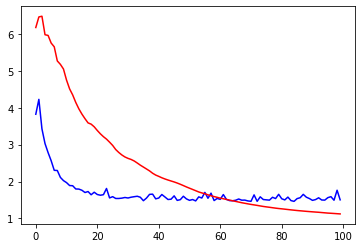

In [12]:
plt.plot(hist.history['loss'], color='b')
plt.plot(hist.history['val_loss'], color='r')
plt.show()

In [13]:
model.evaluate(x_test, y_test)

200/200 [==============================] - 0s 521us/step


[1.1232386064529418, 0.0]

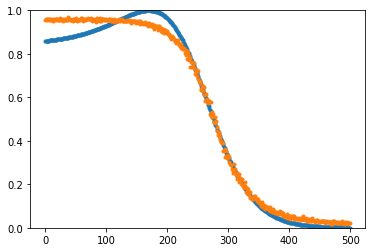

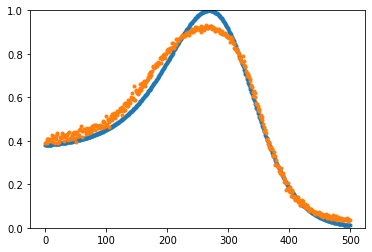

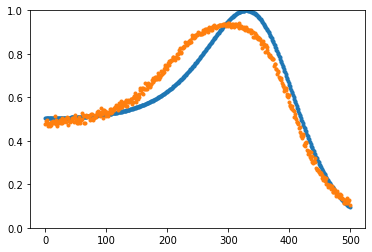

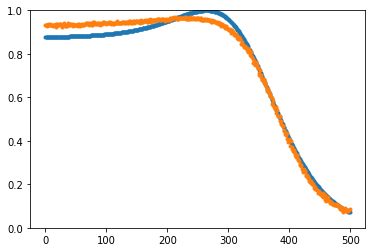

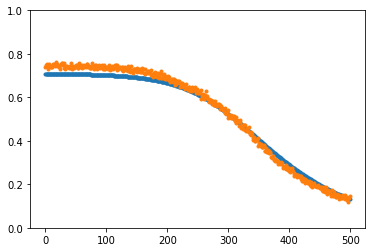

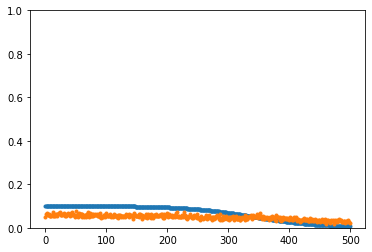

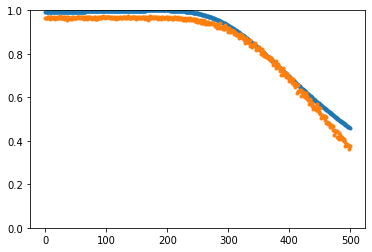

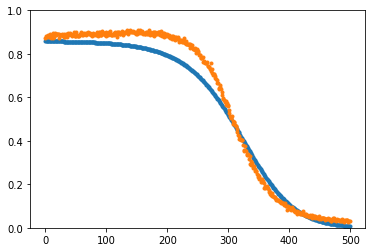

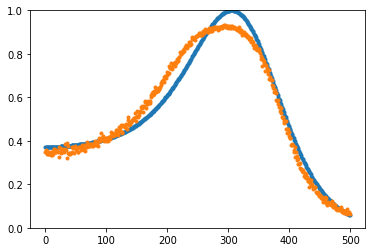

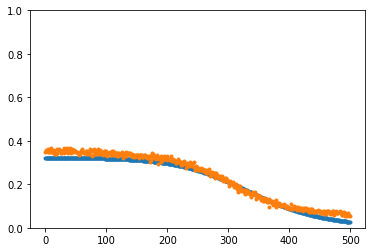

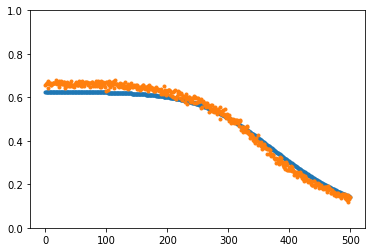

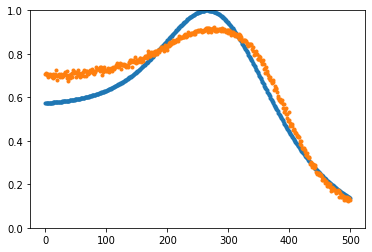

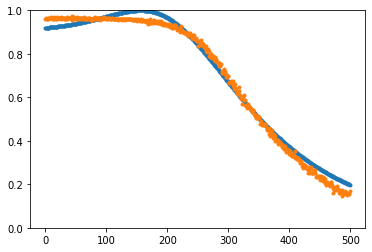

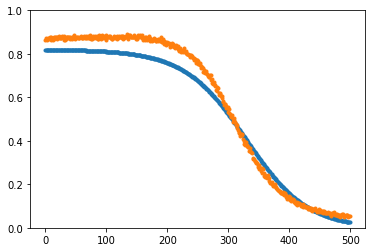

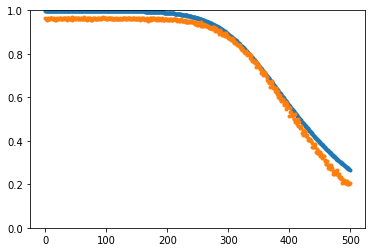

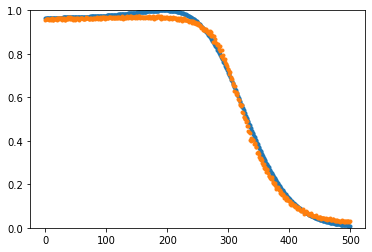

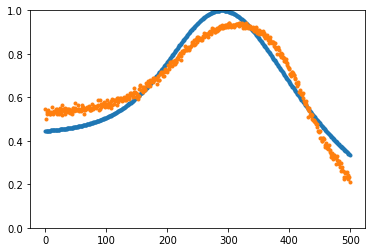

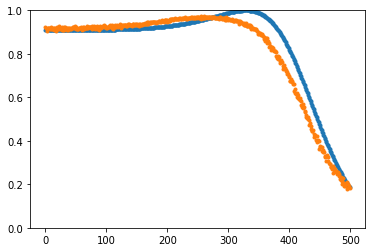

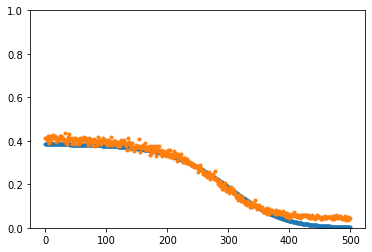

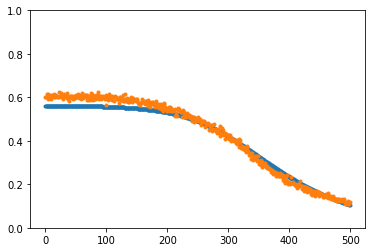

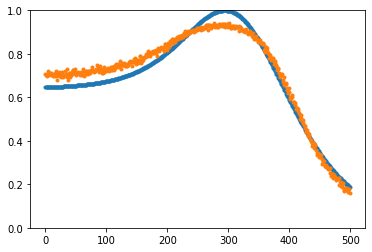

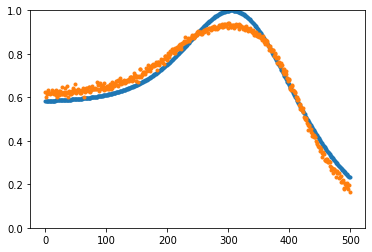

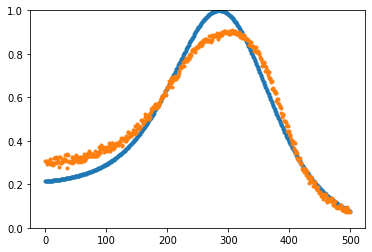

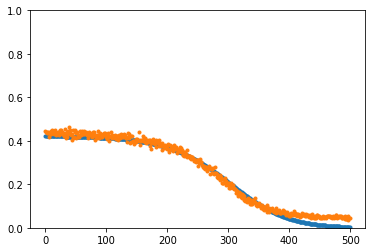

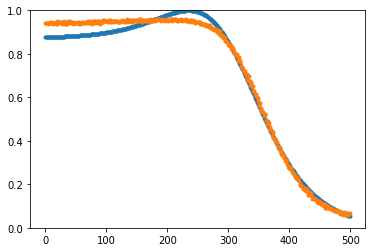

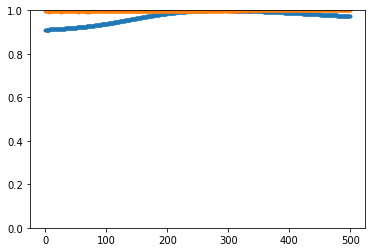

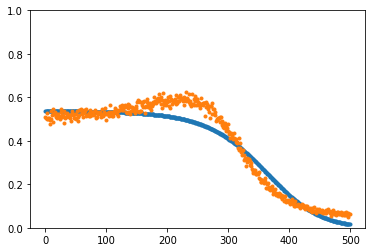

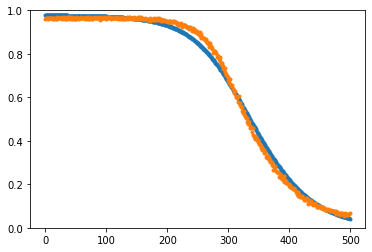

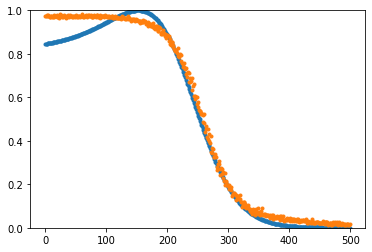

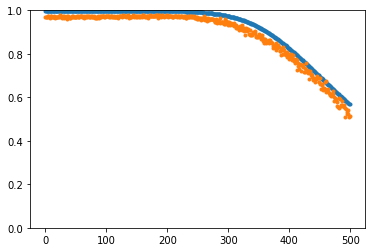

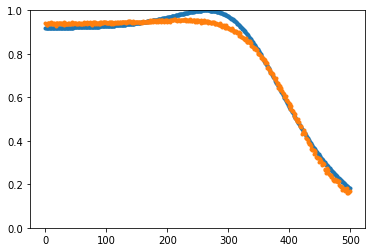

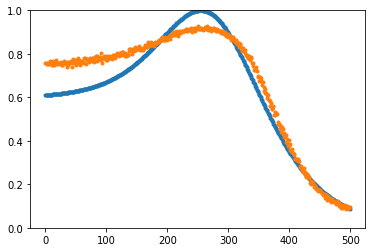

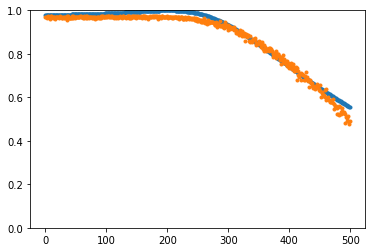

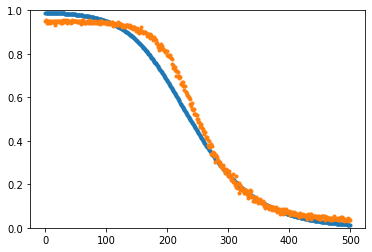

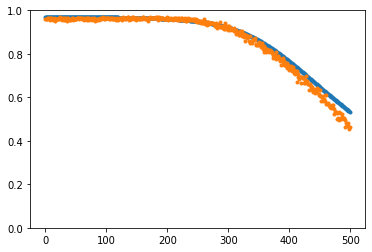

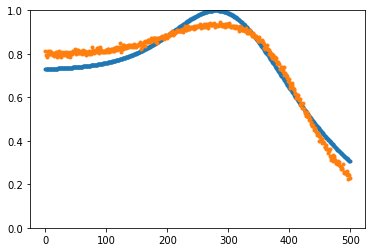

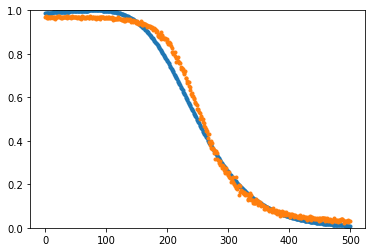

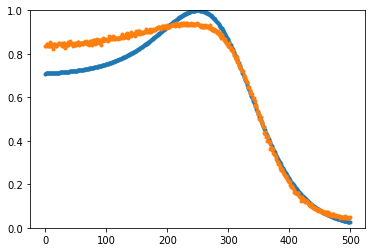

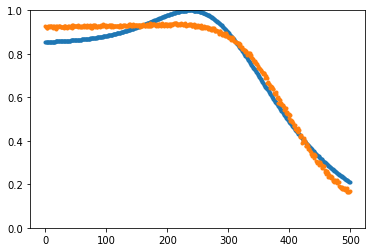

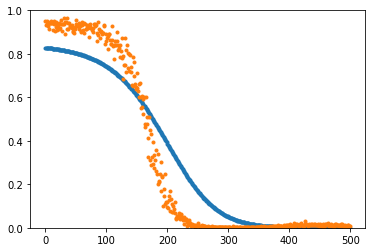

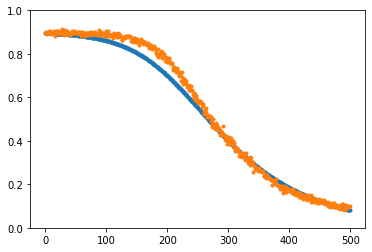

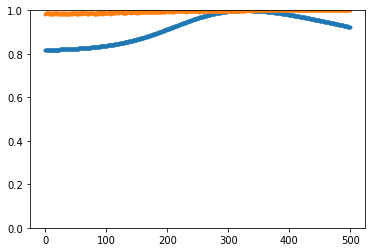

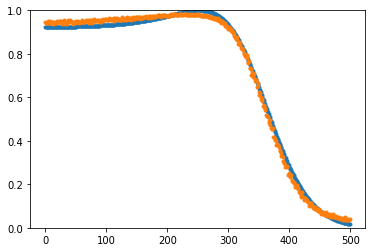

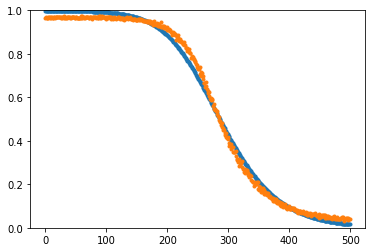

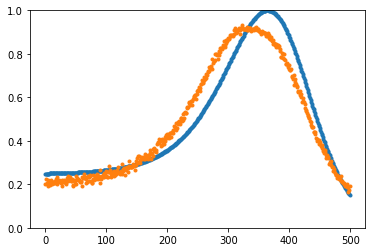

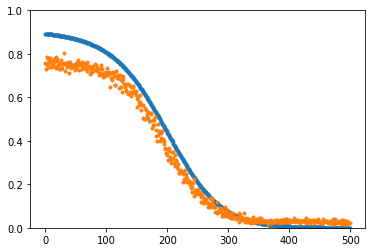

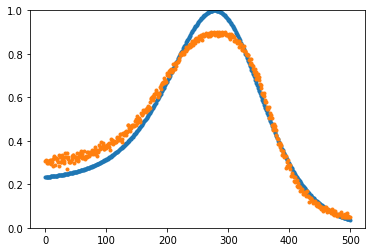

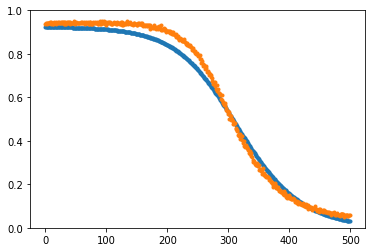

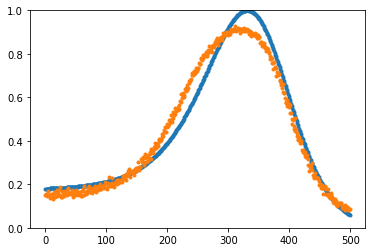

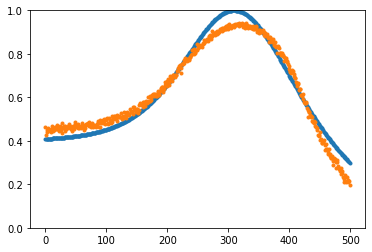

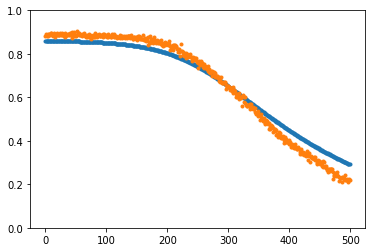

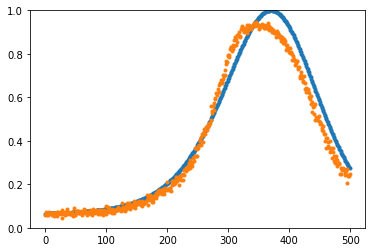

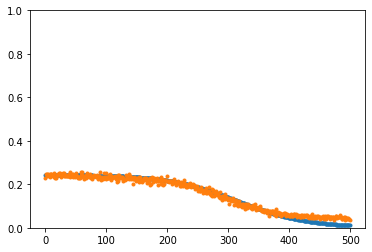

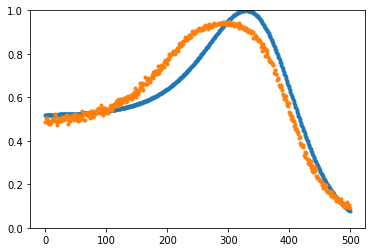

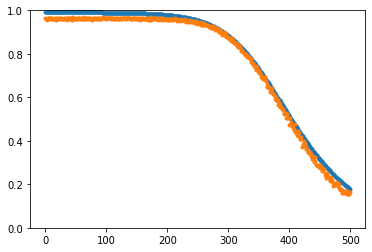

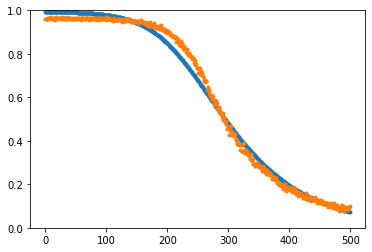

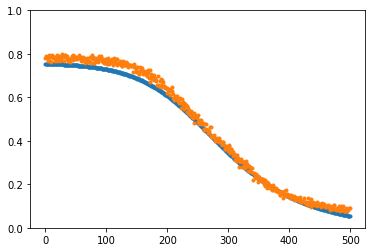

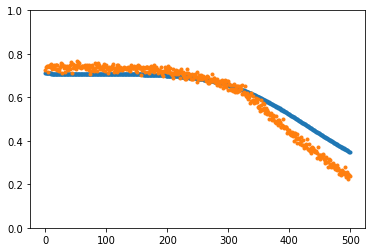

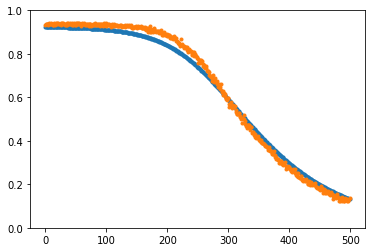

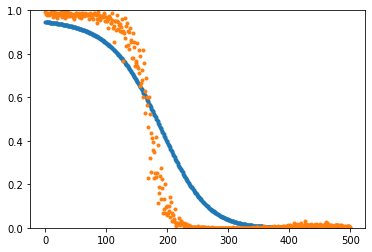

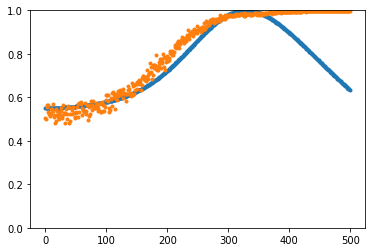

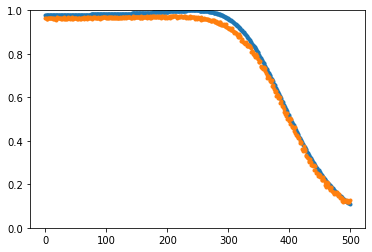

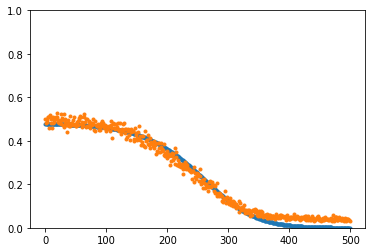

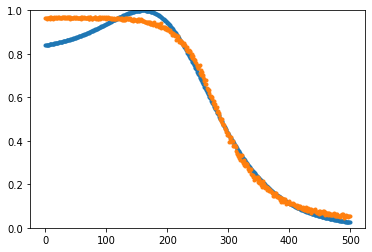

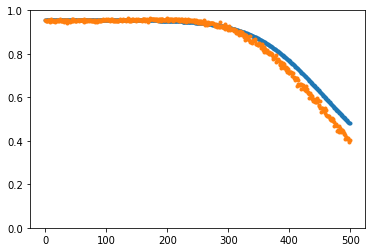

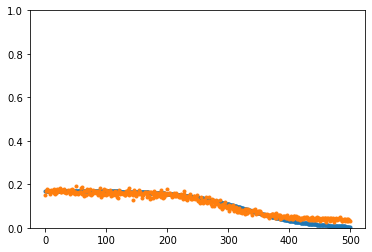

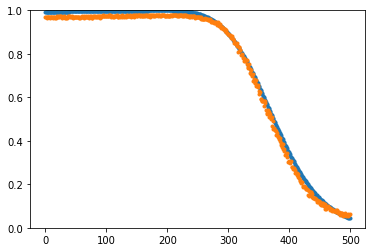

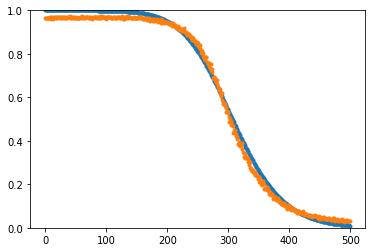

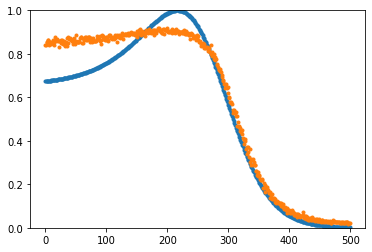

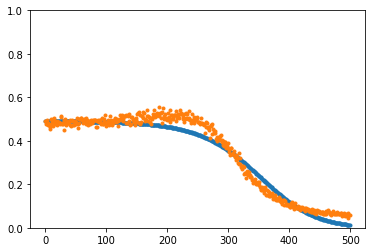

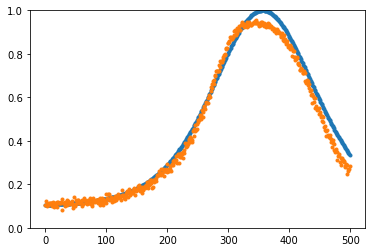

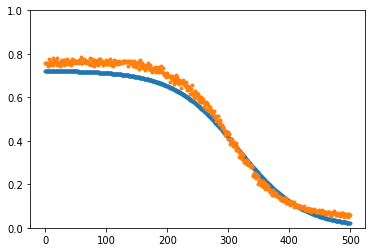

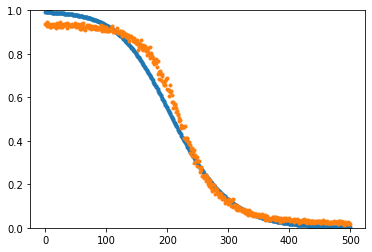

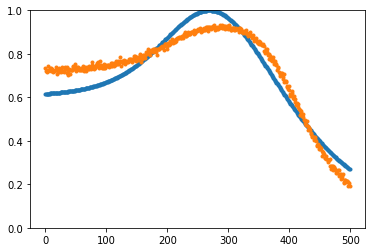

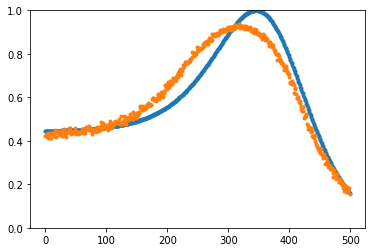

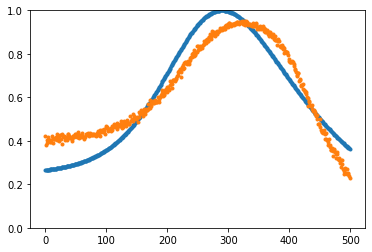

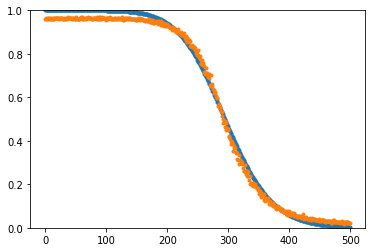

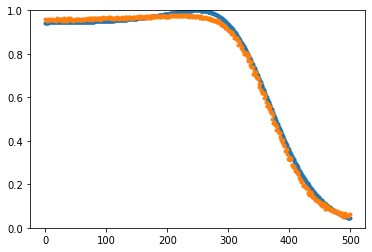

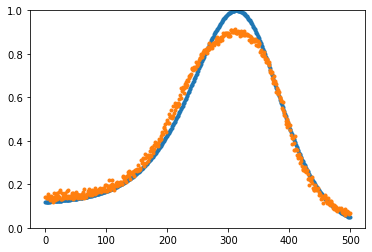

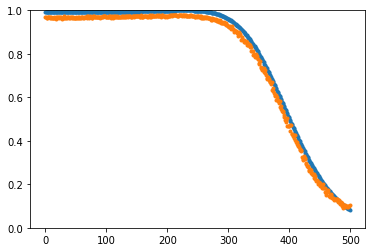

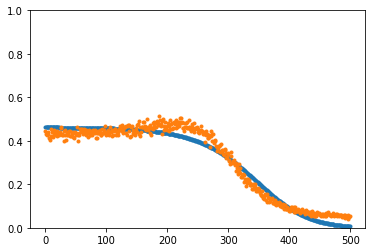

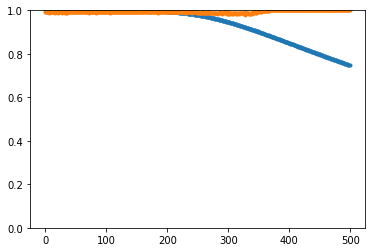

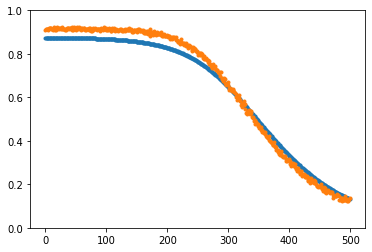

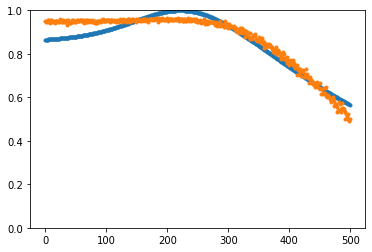

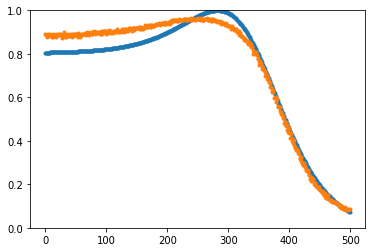

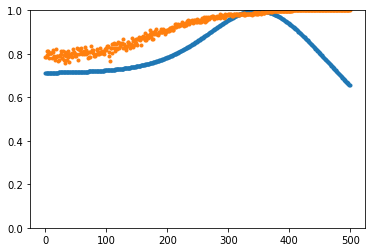

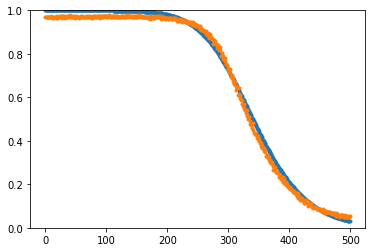

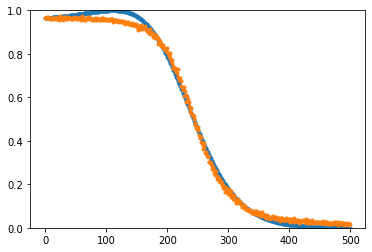

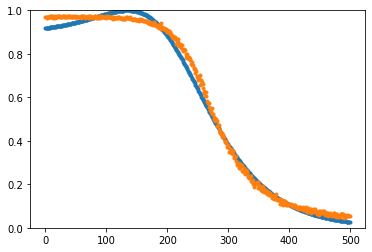

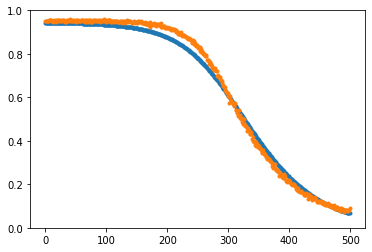

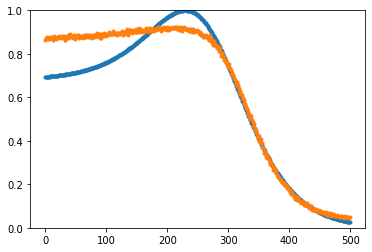

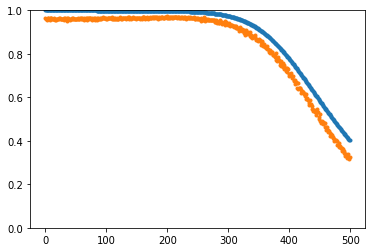

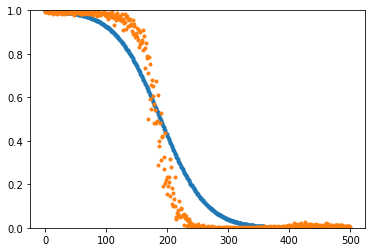

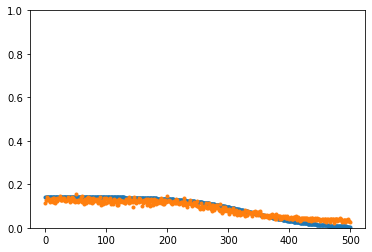

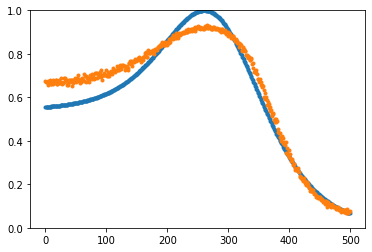

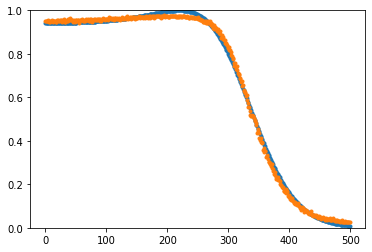

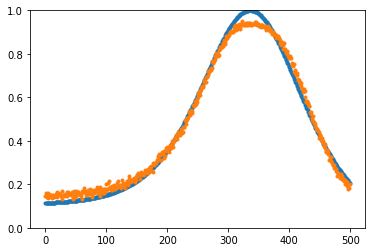

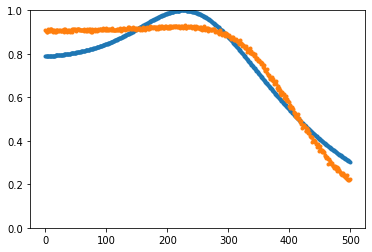

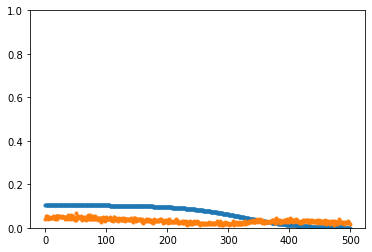

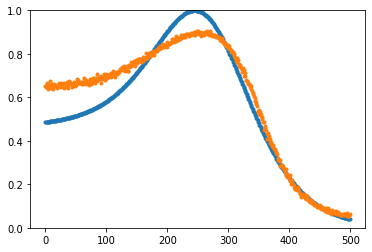

In [20]:
import scipy.ndimage.filters as sp
y_hat=model.predict(x_train)
#y_hat=sp.gaussian_filter1d(model.predict(x_train),10)
np.shape(y_hat)
for i in range(100):
    plt.plot(y_train[i,:])
    plt.plot(y_hat[i,:],'.')
    plt.ylim((0,1))
    plt.show()

In [ ]:
for i in range(10):
    plt.plot(np.gradient(y_train[i,:])*100)
    plt.plot(np.gradient(y_hat[i,:])*100,'.')
    plt.ylim((-1,1))
    plt.show()

In [15]:
np.shape(y_test[:,:-1])

(200, 499)